## Q1 - Dataset

#### Solve this error
NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

Datasets from Reddit: - use the Reddit dataset that we use in the labs

#### Downloading
Let's start by downloading a file containing data scraped from the online forum platform Reddit. This should take at most a few seconds to run.

In [ ]:
!wget -O reddit_posts.json https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EY_R8Y7DkrxMqXGe-zlgeNkBdJU5ZNTf8FYrN2pqDwddMA?download=1

--2023-03-09 14:24:35--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EY_R8Y7DkrxMqXGe-zlgeNkBdJU5ZNTf8FYrN2pqDwddMA?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=8ef1d18f92c34cbca9719efb396078d9 [following]
--2023-03-09 14:24:35--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=8ef1d18f92c34cbca9719efb396078d9
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1279064 (1.2M) [application/json]
Saving to: ‘reddit_posts.json’

reddit_posts.json   100%[===================>]   1.22M  6.82MB/s    in 0.2s    

2023-03-09 14:24:36 (6.82 

#### Import all packages.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json
from collections import Counter
from sklearn.model_selection import train_test_split
import spacy
from scipy.sparse import csr_matrix
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from math import log
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import torch
from sklearn.pipeline import Pipeline

!pip install transformers datasets
from transformers import pipeline, RobertaTokenizer, RobertaModel

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

#### Single example of data

In [ ]:
# Load the data into Python
with open('reddit_posts.json', 'rt') as f:
  reddit_posts = json.load(f)
reddit_posts[0]

{'subreddit': 'Soda',
 'title': 'Anyone tried Irn Bru?',
 'score': 8,
 'id': 'ou5yp1',
 'author': 'jackibhoy',
 'body': 'It’s a Scottish drink and it’s banned some countries and I was wondering if anyone here has tried it. It has quite a unique taste and it’s not something you’d forget quickly. You either love it or hate it I think.'}

#### Basic information of data

In [ ]:
# Investigate the structure of the data
print('type(reddit_posts) =', type(reddit_posts))
print('len(reddit_posts) =', len(reddit_posts))
print('type(reddit_posts[0]) =', type(reddit_posts[0]))
print('reddit_posts[0].keys() =', reddit_posts[0].keys())

type(reddit_posts) = <class 'list'>
len(reddit_posts) = 2000
type(reddit_posts[0]) = <class 'dict'>
reddit_posts[0].keys() = dict_keys(['subreddit', 'title', 'score', 'id', 'author', 'body'])


#### I will use subreddit as labels to classify the text in the body section.

In [ ]:
# Count the number of times each subreddit appears in this dataset
sub_counter = Counter(post['subreddit'] for post in reddit_posts)
sub_counter

Counter({'Soda': 174,
         'tea': 236,
         'xbox': 213,
         'antiMLM': 226,
         'HydroHomies': 210,
         'pcgaming': 225,
         'NintendoSwitch': 249,
         'Coffee': 234,
         'PS4': 233})

#### Create two lists (texts, labels).

In [ ]:
labels, texts = [], []
for i in reddit_posts:
  labels.append(i['subreddit'])
  texts.append( i['title'] + '\n' + i['body'] )

# labels = np.array(labels)
# texts = np.array(texts)
print(labels[-1]) # shape is  2000,
print("------------")
print(texts[-1]) # shape is 2000,

HydroHomies
------------
I’m new to reddit and this sub just confuses me.
Can someone explain why this sub exists? How is the sub about water so popular?


#### Shuffle the two lists

In [ ]:
combined = list(zip(texts, labels))  # combine the lists
random.shuffle(combined)           # shuffle the combined list
texts, labels = zip(*combined)  # separate the lists back out

# print(texts)
# print(labels)

#### Split the data into training (60%), validation(20%) and testing dataset(20%).

In [ ]:
# Your code here
labels_train, labels_test, texts_train, texts_test = train_test_split(
    labels, texts, test_size = 0.2, random_state = 42
)

labels_train, labels_val, texts_train, texts_val = train_test_split(
    labels_train, texts_train, test_size = 0.25, random_state = 42
)

#### Check the size of the different parts after the split.

In [ ]:
print(f"{len(texts_train)=}\t{len(labels_train)=}")
print(f"{len(texts_val)=}\t{len(labels_val)=}")
print(f"{len(texts_test)=}\t{len(labels_test)=}")

len(texts_train)=1200	len(labels_train)=1200
len(texts_val)=400	len(labels_val)=400
len(texts_test)=400	len(labels_test)=400


#### And let's check if we got the desired 60%/20%/20% split.

In [ ]:
total = len(texts_train) + len(texts_val) + len(texts_test)
len(texts_train)/total, len(texts_val)/total, len(texts_test)/total

(0.6, 0.2, 0.2)

## Q2 - Clustering

#### Vectorise text

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

In [ ]:
# Vectorise text
vectorizer = TfidfVectorizer(tokenizer = text_pipeline_spacy)
tf_idf = vectorizer.fit_transform(texts)
# (2000, 9752)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Kmeans function

In [ ]:
def k_means_clustering(tf_idf, labels, k=5, max_iterations=1000, tolerance=1e-6):

    labels = np.array(labels)
    
    # Pick k random "centroids"
    random_indices = np.random.choice(tf_idf.shape[0], size=k, replace=False)
    centroids = tf_idf[random_indices].toarray()

    for i in range(max_iterations):
        # Assign each vector to its closest centroid using cosine similarity
        similarities = cosine_similarity(tf_idf, centroids) # (2000, 5)
        closest_centroids = np.argmax(similarities, axis=1) # (2000, )

        ## Assign the label of the closest vector to each centroid to all the vectors in that cluster
        new_labels = np.zeros_like(closest_centroids, dtype=object)
        for c in range(k):
            cluster_mask = (closest_centroids == c)
            if np.sum(cluster_mask) > 0:
                cluster_labels = labels[cluster_mask]
                centroid_index = np.argmax(similarities[:, c])
                centroid_label = labels[centroid_index]
                new_labels[cluster_mask] = centroid_label
        
        # Recalculate the centroids based on the closest vectors
        new_centroids = np.zeros((k, tf_idf.shape[1]))
        for j in range(k):
            mask = (closest_centroids == j)
            if np.sum(mask) > 0:
                new_centroids[j] = np.mean(tf_idf[mask].toarray(), axis=0)

        # Check if centroids have converged
        if np.allclose(centroids, new_centroids, atol=tolerance):
            break
        centroids = new_centroids
    return closest_centroids, new_labels

#### Check the output

In [ ]:
closest_centroids, predicted_labels = k_means_clustering(tf_idf, labels, k=5)
print(Counter(closest_centroids)) ## shape = (2000, )
print(Counter(predicted_labels)) # shape = (2000, )
# predicted_labels is a 1D array that assigns each document to a cluster based on the closest centroid

Counter({1: 758, 0: 389, 3: 359, 2: 277, 4: 217})
Counter({'xbox': 758, 'HydroHomies': 389, 'antiMLM': 359, 'Soda': 277, 'tea': 217})


#### Print a few examples of documents assigned to each cluster
#### Print the top 5 tokens with the highest magnitude in each centroid

In [ ]:
# Print a few examples of documents assigned to each cluster
for cluster in range(5):
    print(f"Cluster {cluster}:")
    for i, label in enumerate(closest_centroids):
        if label == cluster:
            print(f"Doc {i}: {texts[i]}")
            break
    print()

# Print the top 5 tokens with the highest magnitude in each centroid
centroids = np.zeros((5, tf_idf.shape[1]))
for i in range(5):
    mask = (closest_centroids == i)
    centroids[i] = np.mean(tf_idf[mask], axis=0)
    top_tokens = np.argsort(centroids[i])[::-1][:5]
    top_token_scores = centroids[i][top_tokens]
    top_token_names = vectorizer.get_feature_names_out()[top_tokens]
    print(f"Top tokens for Cluster {i}:")
    for token, score in zip(top_token_names, top_token_scores):
        print(f"{token}: {score}")
    print()

Cluster 0:
Doc 0: What’s your favorite kind of Bottled Water?
Let me preface and say that I don’t seek out bottled water and my preferred source will always be filtered water from the tap. With that out of the way, I think Ice Mountain is easily the best out of the cheaper store brands like Dasani (overly minerally and kinda salty) or Aquafina which also has an overly strong mineral flavor imo.

Cluster 1:
Doc 4: Can i pay with both PayPal and Ps4 funds at the same time?
So i want to buy a ps4 game which is 2.99$ but i only have 2.09$ added in funds... can i add those 90 cents that are missing with PayPal while still paying the 2.09$ with my funds and get the game?? Or does the money all have to come from one source

Cluster 2:
Doc 2: I hope y'all a proud of me
Now I know some of y'all have been soda free for awhile but I just was in a gas station and was about to grab my go to soda... But then I was like... Nah and grabbed some H2O in a bottle. 
Ive been trying to reduce my intake of 

#### Compute the confusion matrix and print it

In [ ]:
true_labels = np.array(labels).reshape(-1)

# # Compute the confusion matrix between the predicted clusters and the true labels
# cm = confusion_matrix(true_labels, closest_centroids)
# closest_centroids  predicted_labels

# create a dictionary to map labels to integers
label_dict = {label: i for i, label in enumerate(set(true_labels))}

# convert true labels to integers
true_labels_int = [label_dict[label] for label in true_labels]

all_labels = list(set(labels))
cm = np.zeros((9,5))
for i,j in zip(closest_centroids, true_labels_int):
  cm[j][i]+=1

# # Print the confusion matrix
print(f"Confusion matrix shape :{cm.shape}")
print(cm)

Confusion matrix shape :(9, 5)
[[  1. 174.  16.  42.   0.]
 [ 17.   0. 153.   3.   1.]
 [  3.   0.   3. 218.   2.]
 [  7.   0.  14.   2. 213.]
 [  1. 185.   8.  19.   0.]
 [  0. 219.  19.  11.   0.]
 [  1. 178.  17.  29.   0.]
 [182.   0.   9.  18.   1.]
 [177.   2.  38.  17.   0.]]


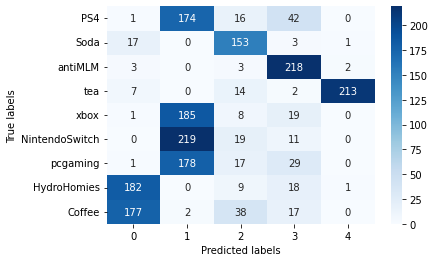

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# y_true = labels_test_encoded
# label_keys = label_encoder.classes_

# # Compute the confusion matrix
# cm = confusion_matrix(y_true, label_ids)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=list(range(5)), yticklabels=all_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Q3 - Comparing Classifiers

#### 1. Dummy Classifier with strategy="most_frequent" 

            Accuracy  Precision  Recall     F1
Training       0.127      0.903   0.111  0.025
Validation     0.102      0.900   0.111  0.021


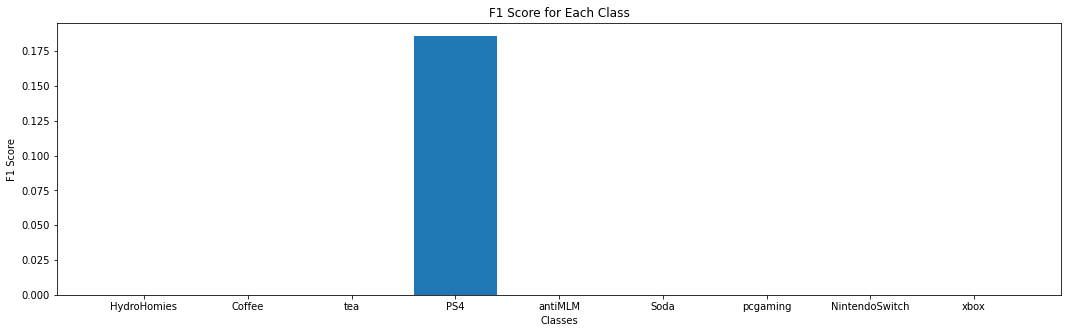

In [ ]:
# Instantiate the classifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
dummy_clf.fit(texts_train, labels_train)

# Make predictions on the training set
y_train_pred = dummy_clf.predict(texts_train)

# Evaluate the performance of the classifier on the training set
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average="macro", zero_division=1)

# Make predictions on the validation set
y_val_pred = dummy_clf.predict(texts_val)

# Evaluate the performance of the classifier on the validation set
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)

# Get the validation performance
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
most_frequent_test = [test_accuracy, test_precision, test_recall, test_f1]

# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

# Create a bar chart with the F1 score for each class
y_classes = list(set(labels_val))
y_f1 = []
for label in y_classes:
    _, _, f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, labels=[label], average="macro", zero_division=1)
    y_f1.append(f1)


plt.figure(figsize=(18, 5))
plt.bar(y_classes, y_f1)
plt.title("F1 Score for Each Class")
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.show()


#### Dummy Classifier with strategy="stratified"

            Accuracy  Precision  Recall     F1
Training       0.101      0.099   0.099  0.099
Validation     0.112      0.112   0.108  0.109


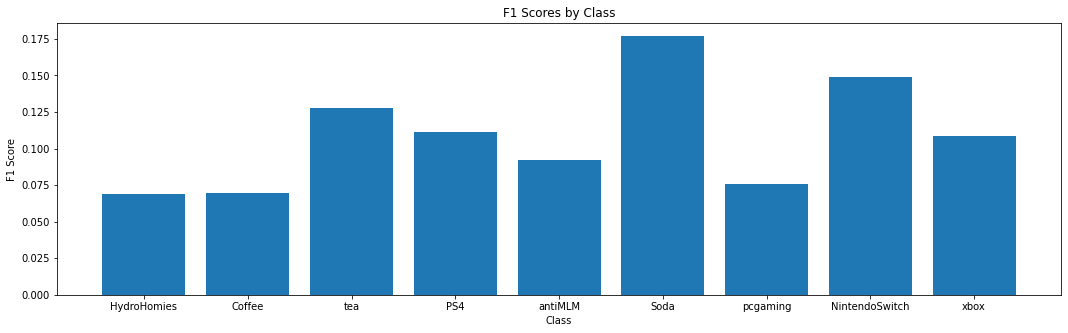

In [ ]:
# Create a Dummy Classifier with strategy="stratified"
dummy_clf = DummyClassifier(strategy="stratified")

# Train the Dummy Classifier on the training set
dummy_clf.fit(texts_train, labels_train)

# Make predictions on the training set
y_train_pred = dummy_clf.predict(texts_train)

# Evaluate the performance of the classifier on the training set
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average="macro", zero_division=1)

# Make predictions on the validation set
y_val_pred = dummy_clf.predict(texts_val)

# Evaluate the performance of the classifier on the validation set
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)

# Get the validation performance
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
stratified_test = [test_accuracy, test_precision, test_recall, test_f1]

# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

# Create a bar chart of F1 scores for each class
f1_scores = precision_recall_fscore_support(labels_val, y_val_pred, average=None)[2]
classes = list(set(labels_val))
plt.figure(figsize=(18, 5))
plt.bar(classes, f1_scores)
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Scores by Class")
plt.show()

#### LogisticRegression with One-hot vectorization

In [ ]:
# Vectorize the training and validation texts using One-hot vectorization:
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

In [ ]:
# Train the LogisticRegression model:
clf = LogisticRegression()
clf.fit(X_train, labels_train)

LogisticRegression()

In [ ]:
# Evaluate the model on the validation set and calculate the evaluation metrics:
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average='macro', zero_division=1)

# Evaluate the model on the training set and calculate the evaluation metrics:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average='macro', zero_division=1)

# Get the test performance
# X_test = vectorizer.transform(texts_test)
# y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
LR_onehot_test = [test_accuracy, test_precision, test_recall, test_f1]

            Accuracy  Precision  Recall     F1
Training       1.000      1.000   1.000  1.000
Validation     0.805      0.807   0.804  0.801


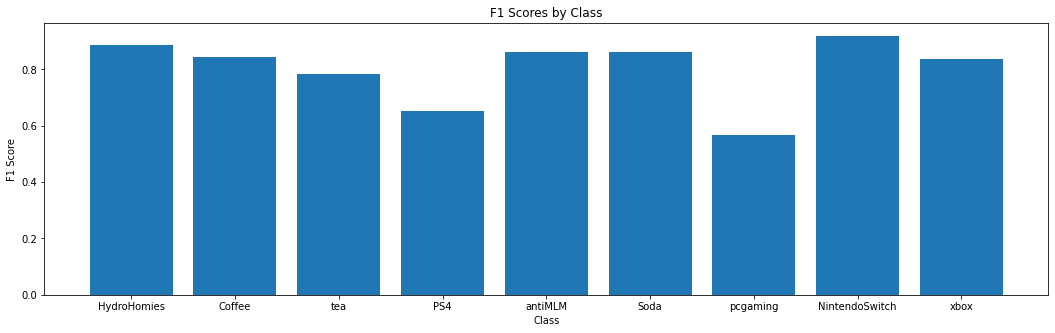

In [ ]:
# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

# Create a bar chart of F1 scores for each class
f1_scores = precision_recall_fscore_support(labels_val, y_val_pred, average=None)[2]
classes = list(set(labels_val))
plt.figure(figsize=(18, 5))
plt.bar(classes, f1_scores)
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Scores by Class")
plt.show()

#### LogisticRegression with TF-IDF vectorization

            Accuracy  Precision  Recall     F1
Training       0.992      0.992   0.991  0.992
Validation     0.812      0.830   0.808  0.812


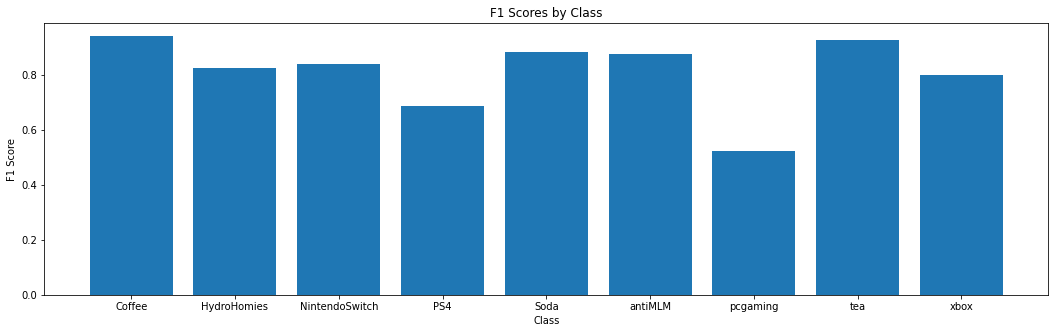

In [ ]:
# Vectorize the texts
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(texts_train)
X_val = tfidf.transform(texts_val)

# Train a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, labels_train)

# Predict labels for validation set and evaluate the model on the validation set and calculate the evaluation metrics:
y_val_pred = lr.predict(X_val)
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average='macro', zero_division=1)

# Predict labels ofr training set and evaluate the model on it then calculate the evaluation metrics:
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average='macro', zero_division=1)

# Get the test performance
# X_test = tfidf.transform(texts_test)
# y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
LR_TFIDF_test = [test_accuracy, test_precision, test_recall, test_f1]

# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

# Create a bar chart of F1 scores for each class
f1_scores = precision_recall_fscore_support(labels_val, y_val_pred, average=None)[2]
classes = np.unique(labels_val)
plt.figure(figsize=(18, 5))
plt.bar(classes, f1_scores)
plt.title("F1 Scores by Class")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.show()


#### SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)

            Accuracy  Precision  Recall     F1
Training       0.972      0.978   0.972  0.974
Validation     0.678      0.730   0.676  0.688


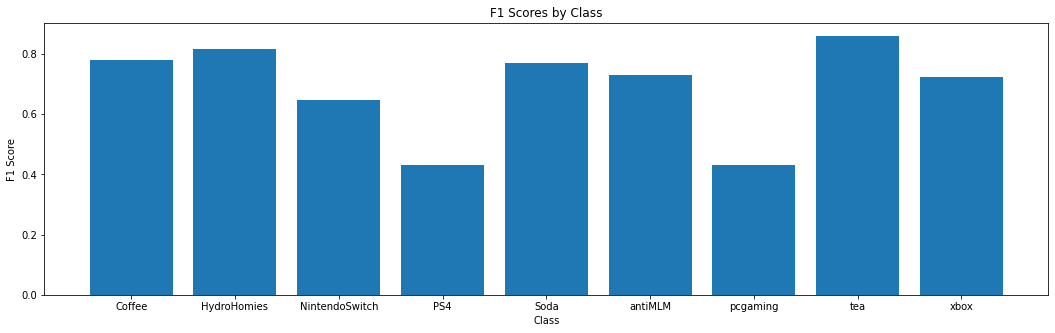

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

# Train the SVC classifier
svc = SVC()
svc.fit(X_train, labels_train)

# Make predictions on the validation set
y_val_pred = svc.predict(X_val)

# Evaluate the performance of the classifier on the validation set
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)

# Make predictions on the training set
y_train_pred = svc.predict(X_train)

# Evaluate the performance of the classifier on the training set
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average="macro", zero_division=1)

# Get the test performance
# X_test = vectorizer.transform(texts_test)
# y_test_pred = svc.predict(X_test)
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
SVC_test = [test_accuracy, test_precision, test_recall, test_f1]

# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

# Create a bar chart of the F1 scores for each class
f1_scores = precision_recall_fscore_support(labels_val, y_val_pred, average=None)[2]
classes = np.unique(labels_val)
plt.figure(figsize=(18, 5))
plt.bar(classes, f1_scores)
plt.title("F1 Scores by Class")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.show()

### Choose my own classifier/tokenisation/normalisation approach from Scikit Learn

#### Random Forest classifier with TF-IDF vectorization for text classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer = text_pipeline_spacy)

# Vectorize training and validation data
X_train = vectorizer.fit_transform(texts_train)
X_val = vectorizer.transform(texts_val)

# Train random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, labels_train)

# Make predictions on the validation set
y_val_pred = rf.predict(X_val)

# Evaluate the performance of the classifier on the validation set
val_accuracy = accuracy_score(labels_val, y_val_pred)
val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Evaluate the performance of the classifier on the training set
train_accuracy = accuracy_score(labels_train, y_train_pred)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(labels_train, y_train_pred, average="macro", zero_division=1)

# Get the test performance
X_test = vectorizer.transform(texts_test)
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(labels_val, y_val_pred)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(labels_val, y_val_pred, average="macro", zero_division=1)
RF_TFIDF_test = [test_accuracy, test_precision, test_recall, test_f1]

# Create a table with the evaluation metrics
data = {"Accuracy": [train_accuracy, val_accuracy],
        "Precision": [train_precision, val_precision],
        "Recall": [train_recall, val_recall],
        "F1": [train_f1, val_f1]}
index = ["Training", "Validation"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


            Accuracy  Precision  Recall     F1
Training       1.000      1.000   1.000  1.000
Validation     0.822      0.828   0.818  0.815


#### Report on its performance with respect to the five baselines from above on the test set.

In [ ]:
# Create a table with the evaluation metrics
print("Performance on the validation set")
print()
data = {"most_frequent": most_frequent_test,
        "stratified": stratified_test,
        "LogisticRegression with One-hot": LR_onehot_test,
        "LogisticRegression with TF-IDF": LR_TFIDF_test,
        "SVC Classifier with One-hot":SVC_test,
        "Random Forest with TF-IDF":RF_TFIDF_test,
        }
index = ["Accuracy", "Precision", "Recall", "F1"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)

Performance on the validation set

           most_frequent  stratified  LogisticRegression with One-hot  \
Accuracy           0.102       0.112                            0.805   
Precision          0.900       0.112                            0.807   
Recall             0.111       0.108                            0.804   
F1                 0.021       0.109                            0.801   

           LogisticRegression with TF-IDF  SVC Classifier with One-hot  \
Accuracy                            0.812                        0.678   
Precision                           0.830                        0.730   
Recall                              0.808                        0.676   
F1                                  0.812                        0.688   

           Random Forest with TF-IDF  
Accuracy                       0.822  
Precision                      0.828  
Recall                         0.818  
F1                             0.815  


## Q4 - Parameter Tuning

In [ ]:
# Define the pipeline with the vectorizer and classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=10000))
])


param_grid_vec = {'tfidf__sublinear_tf': [True, False], 
                  'tfidf__max_features': [None, 10000, 20000, 30000, 40000, 50000]}
param_grid_clf = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

# # Define the parameter grid to search
# param_grid = {
#     'tfidf__sublinear_tf': [True, False],
#     'tfidf__max_features': [None, 10000, 20000, 30000, 40000, 50000],
#     'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
# }


# perform grid search for vectorizer parameters
grid_search_vec = GridSearchCV(
    pipeline, param_grid=param_grid_vec, cv=5, n_jobs=-1, verbose=1
)
grid_search_vec.fit(texts_train, labels_train)

# get the best vectorizer parameter values
best_sublinear_tf = grid_search_vec.best_params_['tfidf__sublinear_tf']
best_max_features = grid_search_vec.best_params_['tfidf__max_features']

# set the best vectorizer parameter values in the pipeline
pipeline.set_params(tfidf__sublinear_tf=best_sublinear_tf, 
                    tfidf__max_features=best_max_features)

# perform grid search for classifier parameters
grid_search_clf = GridSearchCV(pipeline, param_grid_clf, cv=5, n_jobs=-1,verbose=1)
grid_search_clf.fit(texts_train, labels_train)

print()

# get the best classifier parameter value
best_c = grid_search_clf.best_params_['clf__C']

# set the best classifier parameter value in the pipeline
pipeline.set_params(clf__C=best_c)

# fit the pipeline on the training data
pipeline.fit(texts_train, labels_train)


# Print the best parameters found
print(f"vectorizer parameters: {pipeline.get_params()['tfidf']}, classifier parameters: {pipeline.get_params()['clf']}, tfidf__max_features: {pipeline.get_params()['tfidf__max_features']}")

# evaluate on the validation data
accuracy = pipeline.score(texts_val, labels_val)
predictions = pipeline.predict(texts_val)
precision, recall, f1, _ = precision_recall_fscore_support(labels_val, predictions, average='macro')


print()
# Create a table with the evaluation metrics
data = {"Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        }
index = ["LogisticRegression with TF-IDF"]
df = pd.DataFrame(data, index=index)
df = df.round(3)
print(df)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits

vectorizer parameters: TfidfVectorizer(sublinear_tf=True), classifier parameters: LogisticRegression(C=100, max_iter=10000), tfidf__max_features: None

                                Accuracy  Precision  Recall     F1
LogisticRegression with TF-IDF     0.848      0.851   0.845  0.844


## Q5 - Context vectors using BERT

### （a）

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import torch
from transformers import RobertaTokenizer, RobertaModel
from transformers import pipeline

## Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')
model.to(device)

def GetOutput(text):
    tokenized = tokenizer.encode_plus(text, truncation=True, add_special_tokens=True, return_tensors='pt')
    ids = tokenized["input_ids"]
    mask = tokenized["attention_mask"]
    return{
        "ids": torch.LongTensor(ids),
        "mask": torch.LongTensor(mask)
    } 

# Define a function to extract the [CLS] token embeddings for a given text
def extract_cls_embedding(text):
    encoding = GetOutput(text)
    ids = encoding["ids"].to(device)
    mask = encoding["mask"].to(device)
    outputs = model(ids, mask)
    # print(type(outputs))
    # print(outputs)
    last_hidden_state = outputs[0]
    cls_embedding = last_hidden_state[:, 0, :].detach()
    cls_embedding_numpy = cls_embedding.cpu().numpy().flatten()
    return cls_embedding_numpy

# Encode the training set texts and labels
train_embeddings = [extract_cls_embedding(text) for text in texts_train]
X_train = train_embeddings
y_train = labels_train

# Train a logistic regression classifier on the training set
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
val_embeddings = [extract_cls_embedding(text) for text in texts_val]
X_val = val_embeddings
y_val = labels_val
y_val_pred = clf.predict(X_val)
print(classification_report(y_val, y_val_pred))


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                precision    recall  f1-score   support

        Coffee       0.84      0.84      0.84        45
   HydroHomies       0.83      0.95      0.89        42
NintendoSwitch       0.61      0.68      0.64        41
           PS4       0.51      0.50      0.51        44
          Soda       0.97      0.80      0.88        45
       antiMLM       0.94      0.98      0.96        48
      pcgaming       0.71      0.60      0.65        45
           tea       0.86      0.88      0.87        41
          xbox       0.67      0.69      0.68        49

      accuracy                           0.77       400
     macro avg       0.77      0.77      0.77       400
  weighted avg       0.77      0.77      0.77       400



### (b)

#### Using a GPU
Be sure to request a Google Colab. It should already be set up to request one. You can check under Edit -> Notebook settings and change Hardware accelerator to GPU as in the screenshot below. There is a limit on the notebooks that you can run with a GPU on the free tier of Colab. And unfortunately sometimes Google Cloud gets rather busy and it can be difficult to get a GPU.

In [ ]:
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': label,
        }



def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': acc,
        'precision': p,
        'recall': r,
        'f1': f1,
    }

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the label data and transform the label data
labels_train_encoded = label_encoder.fit_transform(labels_train)
labels_val_encoded = label_encoder.transform(labels_val)
labels_test_encoded = label_encoder.transform(labels_test)

# Check the number of classes
num_classes = len(label_encoder.classes_)
print('Number of classes:', num_classes)

Number of classes: 9


In [ ]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DataCollatorWithPadding

# Create the tokenizer and the model
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_classes)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-4,
    weight_decay=0,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_total_limit=1,
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=TextDataset(texts_train, labels_train_encoded, tokenizer),
    eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer),
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

In [ ]:
# Train the model
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate(eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer))

# Print the evaluation results
print(eval_results)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1200
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 75
  Number of trainable parameters = 124652553
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,0.706700,0.576050


***** Running Evaluation *****
  Num examples = 400
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-75
Configuration saved in ./results/checkpoint-75/config.json
Model weights saved in ./results/checkpoint-75/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-75 (score: 0.5760501027107239).
Deleting older checkpoint [results/checkpoint-75] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 400
  Batch size = 16


{'eval_loss': 0.5760501027107239, 'eval_runtime': 2.9483, 'eval_samples_per_second': 135.67, 'eval_steps_per_second': 8.479, 'epoch': 1.0}


In [ ]:
# Define the evaluation function to compute the evaluation metrics
def compute_metrics(eval_pred):
    y_true = eval_pred.label_ids
    y_pred = eval_pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

# Set the compute_metrics argument for the trainer
trainer.compute_metrics = compute_metrics

# Evaluate the model on the validation set and get the evaluation metrics
eval_results = trainer.evaluate(eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer))

# Print the evaluation metrics
print(eval_results)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 16


{'eval_loss': 0.5760501027107239, 'eval_accuracy': 0.8, 'eval_precision': 0.7996780682981722, 'eval_recall': 0.8, 'eval_f1': 0.7777997146502611, 'eval_runtime': 3.0142, 'eval_samples_per_second': 132.706, 'eval_steps_per_second': 8.294, 'epoch': 1.0}


### (C)

#### 1

In [ ]:
training_args_1 = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_total_limit=1,
    save_strategy='epoch',
    load_best_model_at_end=True,
)
# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args_1,
    train_dataset=TextDataset(texts_train, labels_train_encoded, tokenizer),
    eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer),
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# Train the model
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1200
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 76
  Number of trainable parameters = 124652553


Epoch,Training Loss,Validation Loss
1,0.410400,0.396132
2,0.312400,0.339005


***** Running Evaluation *****
  Num examples = 400
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-38
Configuration saved in ./results/checkpoint-38/config.json
Model weights saved in ./results/checkpoint-38/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 400
  Batch size = 32
Saving model checkpoint to ./results/checkpoint-76
Configuration saved in ./results/checkpoint-76/config.json
Model weights saved in ./results/checkpoint-76/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-76 (score: 0.3390050232410431).
Deleting older checkpoint [results/checkpoint-38] due to args.save_total_limit
Deleting older checkpoint [results/checkpoint-76] due to args.save_total_limit


TrainOutput(global_step=76, training_loss=0.3852933613877547, metrics={'train_runtime': 70.5872, 'train_samples_per_second': 34.0, 'train_steps_per_second': 1.077, 'total_flos': 157876555161600.0, 'train_loss': 0.3852933613877547, 'epoch': 2.0})

In [ ]:
# Define the evaluation function to compute the evaluation metrics
def compute_metrics(eval_pred):
    y_true = eval_pred.label_ids
    y_pred = eval_pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

# Set the compute_metrics argument for the trainer
trainer.compute_metrics = compute_metrics

# Evaluate the model on the validation set and get the evaluation metrics
eval_results = trainer.evaluate(eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer))

# Print the evaluation metrics
print(eval_results)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 32


{'eval_loss': 0.3390050232410431, 'eval_accuracy': 0.895, 'eval_precision': 0.8953217791540277, 'eval_recall': 0.895, 'eval_f1': 0.8947951766346283, 'eval_runtime': 3.143, 'eval_samples_per_second': 127.267, 'eval_steps_per_second': 4.136, 'epoch': 2.0}


#### 2

In [ ]:
training_args_2 = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=5e-5,
    weight_decay=0,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_total_limit=1,
    save_strategy='epoch',
    load_best_model_at_end=True,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args_2,
    train_dataset=TextDataset(texts_train, labels_train_encoded, tokenizer),
    eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer),
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# Train the model
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1200
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 150
  Number of trainable parameters = 124652553


Epoch,Training Loss,Validation Loss
1,0.462700,0.378625


***** Running Evaluation *****
  Num examples = 400
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-150
Configuration saved in ./results/checkpoint-150/config.json
Model weights saved in ./results/checkpoint-150/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-150 (score: 0.3786250948905945).
Deleting older checkpoint [results/checkpoint-150] due to args.save_total_limit


TrainOutput(global_step=150, training_loss=0.3927660282452901, metrics={'train_runtime': 42.417, 'train_samples_per_second': 28.291, 'train_steps_per_second': 3.536, 'total_flos': 78938277580800.0, 'train_loss': 0.3927660282452901, 'epoch': 1.0})

In [ ]:
# Define the evaluation function to compute the evaluation metrics
def compute_metrics(eval_pred):
    y_true = eval_pred.label_ids
    y_pred = eval_pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

# Set the compute_metrics argument for the trainer
trainer.compute_metrics = compute_metrics

# Evaluate the model on the validation set and get the evaluation metrics
eval_results = trainer.evaluate(eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer))

# Print the evaluation metrics
print(eval_results)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 8


{'eval_loss': 0.3786250948905945, 'eval_accuracy': 0.89, 'eval_precision': 0.8898941440458029, 'eval_recall': 0.89, 'eval_f1': 0.8881034492639839, 'eval_runtime': 3.0233, 'eval_samples_per_second': 132.304, 'eval_steps_per_second': 16.538, 'epoch': 1.0}


#### 3

In [ ]:
training_args_3 = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,
    weight_decay=0,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_total_limit=1,
    save_strategy='epoch',
    load_best_model_at_end=True,
)


# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args_3,
    train_dataset=TextDataset(texts_train, labels_train_encoded, tokenizer),
    eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer),
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# Train the model
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1200
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 75
  Number of trainable parameters = 124652553


Epoch,Training Loss,Validation Loss
1,0.370600,0.390733


***** Running Evaluation *****
  Num examples = 400
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-75
Configuration saved in ./results/checkpoint-75/config.json
Model weights saved in ./results/checkpoint-75/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-75 (score: 0.3907333016395569).
Deleting older checkpoint [results/checkpoint-75] due to args.save_total_limit


TrainOutput(global_step=75, training_loss=0.20045955657958983, metrics={'train_runtime': 38.6784, 'train_samples_per_second': 31.025, 'train_steps_per_second': 1.939, 'total_flos': 78938277580800.0, 'train_loss': 0.20045955657958983, 'epoch': 1.0})

In [ ]:
# Define the evaluation function to compute the evaluation metrics
def compute_metrics(eval_pred):
    y_true = eval_pred.label_ids
    y_pred = eval_pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

# Set the compute_metrics argument for the trainer
trainer.compute_metrics = compute_metrics

# Evaluate the model on the validation set and get the evaluation metrics
eval_results = trainer.evaluate(eval_dataset=TextDataset(texts_val, labels_val_encoded, tokenizer))

# Print the evaluation metrics
print(eval_results)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 16


{'eval_loss': 0.3907333016395569, 'eval_accuracy': 0.895, 'eval_precision': 0.8950290914238036, 'eval_recall': 0.895, 'eval_f1': 0.8947366971770027, 'eval_runtime': 3.0762, 'eval_samples_per_second': 130.03, 'eval_steps_per_second': 8.127, 'epoch': 1.0}


## Q6 - Conclusions and Future Work

### (c)3 is the best model

In [ ]:
test_dataset = TextDataset(texts_test, labels_test_encoded, tokenizer)

# Use the predict method of the trainer to generate predictions on the test set
prediction_output = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 400
  Batch size = 16


In [ ]:
# print(prediction_output)
predictions = prediction_output[0]
label_ids = prediction_output[1]
# Print the evaluation metrics
print(f"Accuracy: {prediction_output[2]['test_accuracy']}")
print(f"Precision: {prediction_output[2]['test_precision']}")
print(f"Recall: {prediction_output[2]['test_recall']}")
print(f"F1 Score: {prediction_output[2]['test_f1']}")

Accuracy: 0.84
Precision: 0.8444755772955531
Recall: 0.84
F1 Score: 0.8406764537503767


In [ ]:
# Get the predicted label for each example in the test set
predicted_labels = [x for x in predictions.argmax(axis=1)]
print(f"Predicted: {predicted_labels}")
print("------------------------------------------------")
print(f"True: {labels_test_encoded}")

Predicted: [5, 8, 5, 0, 1, 5, 1, 5, 1, 8, 0, 3, 7, 6, 2, 7, 8, 6, 8, 8, 6, 5, 8, 3, 1, 0, 4, 5, 8, 3, 1, 7, 5, 7, 3, 0, 8, 5, 2, 6, 8, 6, 8, 7, 1, 7, 1, 5, 5, 0, 3, 6, 4, 0, 0, 3, 1, 1, 5, 5, 3, 0, 6, 0, 7, 0, 0, 8, 8, 1, 5, 1, 6, 4, 1, 2, 7, 6, 8, 5, 5, 1, 3, 3, 4, 0, 2, 6, 4, 6, 4, 0, 6, 4, 4, 5, 1, 2, 1, 5, 6, 1, 4, 7, 0, 5, 5, 6, 6, 4, 2, 3, 5, 3, 2, 6, 5, 8, 2, 3, 1, 2, 3, 7, 6, 6, 3, 4, 2, 1, 8, 0, 5, 8, 6, 8, 7, 5, 0, 8, 4, 4, 7, 6, 0, 6, 2, 5, 0, 1, 5, 5, 5, 2, 7, 7, 7, 7, 7, 8, 3, 4, 8, 5, 6, 6, 0, 6, 7, 5, 6, 6, 7, 1, 5, 8, 0, 0, 5, 2, 5, 2, 2, 1, 0, 8, 0, 3, 5, 4, 8, 5, 1, 7, 5, 1, 5, 0, 3, 6, 3, 6, 0, 7, 5, 6, 6, 3, 6, 0, 1, 6, 6, 4, 0, 2, 2, 4, 7, 1, 8, 0, 7, 4, 8, 4, 7, 2, 6, 6, 0, 8, 2, 0, 6, 8, 1, 6, 2, 1, 0, 6, 7, 5, 2, 2, 6, 6, 4, 6, 7, 5, 5, 3, 7, 5, 3, 8, 8, 7, 2, 3, 8, 1, 1, 5, 3, 1, 8, 1, 6, 6, 6, 5, 7, 5, 8, 2, 2, 2, 8, 4, 6, 2, 6, 7, 1, 7, 3, 7, 7, 0, 7, 7, 3, 2, 2, 3, 5, 0, 7, 4, 7, 6, 1, 6, 8, 5, 0, 2, 8, 5, 8, 0, 2, 2, 3, 4, 3, 1, 5, 5, 3, 2, 6, 8, 0, 2, 3, 8

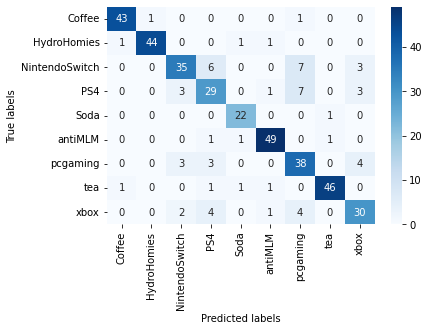

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_true = labels_test_encoded
label_keys = label_encoder.classes_

# Compute the confusion matrix
cm = confusion_matrix(y_true, predicted_labels)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_keys, yticklabels=label_keys)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# check the wrong predicted labels which are antiMLM
print(type(labels_test_encoded))
true_test_labels = list(labels_test_encoded)
for i in range(len(predicted_labels)):
  if predicted_labels[i] == 5 and true_test_labels[i] !=5:
    print(f"True label is {label_keys[true_test_labels[i]]} \nText is \n{texts_test[i]}")
    print("-----------")

<class 'numpy.ndarray'>
True label is PS4 
Text is 
Is there an effective way for me to report an online user to somebody that can help with suicide intervention? An online friend (I don't know their personal details) has reached out to me and said that if they don't feel better in a fewdays, that they'll end it all. I'm concerned for their welfare!
I just want to start by saying that I apologise if this is in the wrong place - please redirect my post as I consider suicide themes imporant to address. 
​
I don't know the best approach here. I've known the guy for a few years, but only through a mutual game and we have mostly surface conversations. That is up until last night, I was about to leave a party that him and I had formed (just text chatting through the in-game system), and he suddenly said "hold up". I asked if everything was ok. That must have been the tipping point for him (I don't think anybodies really asked him out-right) and he said that he just doesn't want to be alive a